In [15]:
import numpy as np
import pandas as pd

# Inisialisasi data TSP
cities = ['A', 'B', 'C', 'D']
distance_matrix = np.array([
    [0, 2, 9,10],
    [2, 0, 6, 4],
    [9, 6, 0, 8],
    [10,4, 8, 0]
], dtype=float)

# Parameter ACO
alpha = 1.0    # bobot feromon
beta = 2.0     # bobot heuristik (jarak)
rho = 0.5      # tingkat evaporasi
Q = 100        # konstanta penguatan feromon
n_ants = 4
n_iterations = 20
n_cities = len(cities)

# Heuristik (eta): 1 / jarak (kecuali diagonal)
eta = 1 / (distance_matrix + np.eye(n_cities))  # tambahkan 1 di diagonal untuk hindari div by zero
np.fill_diagonal(eta, 0)

# Feromon awal
tau = np.ones_like(distance_matrix)

# Simpan rute terbaik
best_route = None
best_cost = np.inf

# Fungsi probabilitas pemilihan kota berikutnya
def select_next_city(current_city, visited, tau, eta):
    probabilities = []
    for j in range(n_cities):
        if j not in visited:
            prob = (tau[current_city, j] ** alpha) * (eta[current_city, j] ** beta)
            probabilities.append(prob)
        else:
            probabilities.append(0)
    total = sum(probabilities)
    probabilities = [p / total if total > 0 else 0 for p in probabilities]
    return np.random.choice(range(n_cities), p=probabilities)

# Iterasi ACO
for iteration in range(n_iterations):
    all_routes = []
    all_costs = []
    for ant in range(n_ants):
        route = []
        visited = set()
        current_city = np.random.randint(n_cities)
        route.append(current_city)
        visited.add(current_city)

        while len(visited) < n_cities:
            next_city = select_next_city(current_city, visited, tau, eta)
            route.append(next_city)
            visited.add(next_city)
            current_city = next_city
        route.append(route[0])  # kembali ke awal

        # Hitung panjang rute
        cost = sum(distance_matrix[route[i], route[i+1]] for i in range(n_cities))
        all_routes.append(route)
        all_costs.append(cost)

        # Update rute terbaik
        if cost < best_cost:
            best_cost = cost
            best_route = route.copy()

    # Update feromon
    tau *= (1 - rho)
    for route, cost in zip(all_routes, all_costs):
        for i in range(n_cities):
            a, b = route[i], route[i+1]
            tau[a, b] += Q / cost
            tau[b, a] += Q / cost  # simetris

# Konversi hasil ke nama kota
best_route_named = [cities[i] for i in best_route]
best_route_named, best_cost


(['A', 'B', 'D', 'C', 'A'], np.float64(23.0))

Rute terbaik: D → C → B → A → D
Total jarak: 13.06


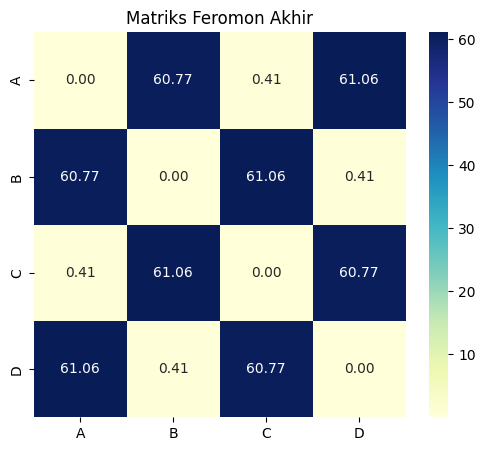

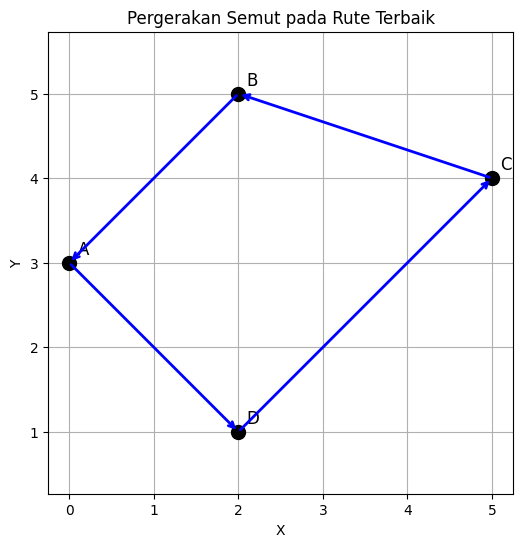

In [17]:
# Re-import and re-initialize after kernel reset
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import dist

# Recreate city coordinates
city_coords = {
    'A': (0, 3),
    'B': (2, 5),
    'C': (5, 4),
    'D': (2, 1)
}
cities = list(city_coords.keys())
coords = np.array([city_coords[city] for city in cities])
n_cities = len(cities)

# Recompute Euclidean distance matrix
distance_matrix = np.zeros((n_cities, n_cities))
for i in range(n_cities):
    for j in range(n_cities):
        if i != j:
            distance_matrix[i, j] = dist(coords[i], coords[j])

# ACO parameters
alpha = 1.0
beta = 2.0
rho = 0.5
Q = 100
n_ants = 4
n_iterations = 10

# Initialize pheromone and heuristic matrices
tau = np.ones_like(distance_matrix)
eta = 1 / (distance_matrix + np.eye(n_cities))
np.fill_diagonal(eta, 0)

# Storage for best route
best_route = None
best_cost = np.inf

def select_next_city(current_city, visited, tau, eta):
    probabilities = []
    for j in range(n_cities):
        if j not in visited:
            prob = (tau[current_city, j] ** alpha) * (eta[current_city, j] ** beta)
            probabilities.append(prob)
        else:
            probabilities.append(0)
    total = sum(probabilities)
    probabilities = [p / total if total > 0 else 0 for p in probabilities]
    return np.random.choice(range(n_cities), p=probabilities)

# Run ACO
for iteration in range(n_iterations):
    all_routes = []
    all_costs = []
    for ant in range(n_ants):
        route = []
        visited = set()
        current_city = np.random.randint(n_cities)
        route.append(current_city)
        visited.add(current_city)

        while len(visited) < n_cities:
            next_city = select_next_city(current_city, visited, tau, eta)
            route.append(next_city)
            visited.add(next_city)
            current_city = next_city
        route.append(route[0])  # return to start

        cost = sum(distance_matrix[route[i], route[i+1]] for i in range(n_cities))
        all_routes.append(route)
        all_costs.append(cost)

        if cost < best_cost:
            best_cost = cost
            best_route = route.copy()

    # Pheromone update
    tau *= (1 - rho)
    for route, cost in zip(all_routes, all_costs):
        for i in range(n_cities):
            a, b = route[i], route[i+1]
            tau[a, b] += Q / cost
            tau[b, a] += Q / cost

# Prepare for visualization
best_route_named = [cities[i] for i in best_route]


# Cetak rute terbaik dengan nama kota dan total jarak
route_str = " → ".join(best_route_named)
print(f"Rute terbaik: {route_str}")
print(f"Total jarak: {best_cost:.2f}")


# Visualize pheromone matrix
plt.figure(figsize=(6, 5))
sns.heatmap(tau, annot=True, fmt=".2f", xticklabels=cities, yticklabels=cities, cmap="YlGnBu")
plt.title("Matriks Feromon Akhir")
plt.show()

# Visualize ant movement on best route
fig, ax = plt.subplots(figsize=(6, 6))
for i, city in enumerate(cities):
    x, y = coords[i]
    ax.plot(x, y, 'o', markersize=10, color='black')
    ax.text(x + 0.1, y + 0.1, city, fontsize=12)

for i in range(n_cities):
    a, b = best_route[i], best_route[i + 1]
    x1, y1 = coords[a]
    x2, y2 = coords[b]
    ax.annotate("",
                xy=(x2, y2), xytext=(x1, y1),
                arrowprops=dict(arrowstyle="->", color='blue', lw=2))

ax.set_title('Pergerakan Semut pada Rute Terbaik')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.grid(True)
plt.axis('equal')
plt.show()
